# 📊 Notebook 01: Exploratory Data Analysis and Preprocessing
## Intelligent Agriculture - Crop Recommendation System

**Objectives:**
1. Load and explore the crop recommendation dataset
2. Perform comprehensive exploratory data analysis (EDA)
3. Data cleaning and quality checks
4. Feature analysis and visualization
5. Data preprocessing and transformation
6. Train/validation/test split
7. Feature scaling and encoding
8. Save preprocessed data and objects for subsequent notebooks

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
# Create directories if they don't exist
os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models/saved_models', exist_ok=True)
os.makedirs('../results/figures', exist_ok=True)
os.makedirs('../results/metrics', exist_ok=True)

print("✅ Directories created/verified")

✅ Directories created/verified


In [3]:
# Load the dataset
print("📊 LOADING DATASET")
print("=" * 50)

data = pd.read_csv('../data/raw/Crop_recommendation.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {data.shape}")
print(f"\nFirst few rows:")
print(data.head(10))

📊 LOADING DATASET
Dataset loaded successfully!
Shape: (2200, 8)

First few rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice


In [4]:
# Basic dataset information
print("\n📈 DATASET INFORMATION")
print("=" * 50)

print("\n1️⃣ Dataset Info:")
print(data.info())

print("\n2️⃣ Statistical Summary:")
print(data.describe())

print("\n3️⃣ Column Names and Types:")
for col in data.columns:
    print(f"  {col}: {data[col].dtype}")

print("\n4️⃣ Missing Values:")
missing = data.isnull().sum()
if missing.sum() == 0:
    print("  ✅ No missing values found!")
else:
    print(missing[missing > 0])

print("\n5️⃣ Duplicate Rows:")
duplicates = data.duplicated().sum()
print(f"  Number of duplicates: {duplicates}")
if duplicates > 0:
    print(f"  Removing {duplicates} duplicate rows...")
    data = data.drop_duplicates()
    print(f"  ✅ New shape: {data.shape}")


📈 DATASET INFORMATION

1️⃣ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

2️⃣ Statistical Summary:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000


🎯 TARGET VARIABLE ANALYSIS

Crop Distribution:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

Number of unique crops: 22
Crops: ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


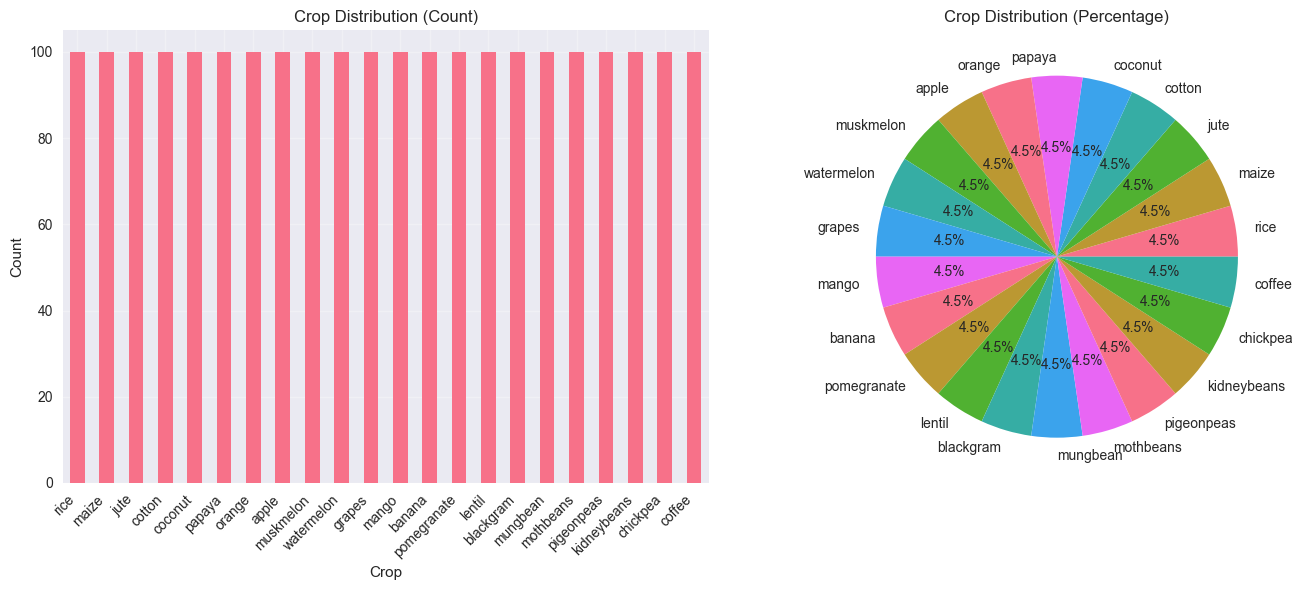


✅ Crop distribution visualization saved


In [5]:
# Target variable analysis
print("\n🎯 TARGET VARIABLE ANALYSIS")
print("=" * 50)

print("\nCrop Distribution:")
crop_counts = data['label'].value_counts()
print(crop_counts)

print(f"\nNumber of unique crops: {data['label'].nunique()}")
print(f"Crops: {sorted(data['label'].unique())}")

# Visualize crop distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
crop_counts.plot(kind='bar')
plt.title('Crop Distribution (Count)')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
crop_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Crop Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.savefig('../results/figures/01_crop_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Crop distribution visualization saved")

In [6]:
# Feature analysis
print("\n🔍 FEATURE ANALYSIS")
print("=" * 50)

feature_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

print("\nFeature Statistics:")
print(data[feature_cols].describe())

# Check for outliers using IQR method
print("\n📊 Outlier Detection (IQR Method):")
for col in feature_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"  {col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")


🔍 FEATURE ANALYSIS

Feature Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091  

In [ ]:
# Feature distributions
print("\n📊 FEATURE DISTRIBUTIONS")
print("=" * 50)

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(data[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
axes[7].axis('off')
axes[8].axis('off')

plt.tight_layout()
plt.savefig('../results/figures/01_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Feature distribution plots saved")


📊 FEATURE DISTRIBUTIONS


In [ ]:
# Correlation analysis
print("\n🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix
correlation_matrix = data[feature_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../results/figures/01_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Correlation matrix saved")

In [ ]:
# Data Preprocessing
print("\n🔧 DATA PREPROCESSING")
print("=" * 50)

# Separate features and target
X = data[feature_cols].copy()
y = data['label'].copy()

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"Target classes: {sorted(y.unique())}")

In [ ]:
# Label Encoding
print("\n🏷️ LABEL ENCODING")
print("=" * 50)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nOriginal labels: {sorted(y.unique())}")
print(f"Encoded labels: {sorted(set(y_encoded))}")
print(f"\nLabel mapping:")
for i, crop in enumerate(label_encoder.classes_):
    print(f"  {crop}: {i}")

# Save label encoder
joblib.dump(label_encoder, '../data/processed/label_encoder.pkl')
print("\n✅ Label encoder saved")

In [ ]:
# Train/Validation/Test Split
print("\n✂️ TRAIN/VALIDATION/TEST SPLIT")
print("=" * 50)

# First split: separate test set (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.15, random_state=42, stratify=y_encoded
)

# Second split: separate train and validation (70% train, 15% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)

print(f"\nDataset split:")
print(f"  Total samples: {len(X)}")
print(f"  Training set: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"  Validation set: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"  Test set: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

In [ ]:
# Feature Scaling
print("\n⚖️ FEATURE SCALING")
print("=" * 50)

# Initialize scaler
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("\nScaled feature ranges (training set):")
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols)
print(X_train_scaled_df.describe())

# Save scaler
joblib.dump(scaler, '../data/processed/scaler.pkl')
print("\n✅ Scaler saved")

In [ ]:
# Save Preprocessed Data
print("\n💾 SAVING PREPROCESSED DATA")
print("=" * 50)

# Create dataframes with encoded labels
train_df = X_train.copy()
train_df['label'] = y_train
train_df['label_name'] = label_encoder.inverse_transform(y_train)

val_df = X_val.copy()
val_df['label'] = y_val
val_df['label_name'] = label_encoder.inverse_transform(y_val)

test_df = X_test.copy()
test_df['label'] = y_test
test_df['label_name'] = label_encoder.inverse_transform(y_test)

# Save to CSV
train_df.to_csv('../data/processed/train.csv', index=False)
val_df.to_csv('../data/processed/validation.csv', index=False)
test_df.to_csv('../data/processed/test.csv', index=False)

print(f"✅ Training data saved: {len(train_df)} samples")
print(f"✅ Validation data saved: {len(val_df)} samples")
print(f"✅ Test data saved: {len(test_df)} samples")

# Save scaled data as well
train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols)
train_scaled_df['label'] = y_train
train_scaled_df.to_csv('../data/processed/train_scaled.csv', index=False)

val_scaled_df = pd.DataFrame(X_val_scaled, columns=feature_cols)
val_scaled_df['label'] = y_val
val_scaled_df.to_csv('../data/processed/validation_scaled.csv', index=False)

test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols)
test_scaled_df['label'] = y_test
test_scaled_df.to_csv('../data/processed/test_scaled.csv', index=False)

print(f"✅ Scaled data saved")

In [ ]:
# Summary Statistics
print("\n📊 PREPROCESSING SUMMARY")
print("=" * 50)

summary = {
    'Total Samples': len(data),
    'Features': len(feature_cols),
    'Target Classes': len(label_encoder.classes_),
    'Training Samples': len(X_train),
    'Validation Samples': len(X_val),
    'Test Samples': len(X_test),
    'Missing Values': 0,
    'Duplicates Removed': 0
}

print("\n📈 Dataset Summary:")
for key, value in summary.items():
    print(f"  {key}: {value}")

# Save summary
import json
with open('../data/processed/preprocessing_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("\n✅ Summary saved to preprocessing_summary.json")

In [ ]:
# Final Summary and Conclusions
print("\n" + "=" * 70)
print("📝 EXPLORATORY DATA ANALYSIS - SUMMARY")
print("=" * 70)

print("\n1️⃣ DATASET OVERVIEW:")
print(f"   Total samples: {len(data)}")
print(f"   Features: {len(feature_cols)}")
print(f"   Target classes: {len(label_encoder.classes_)}")
print(f"   Data quality: ✅ No missing values")

print("\n2️⃣ FEATURE CHARACTERISTICS:")
print(f"   Soil nutrients: N, P, K")
print(f"   Climate factors: temperature, humidity, rainfall")
print(f"   Soil property: pH")
print(f"   All features show reasonable distributions")

print("\n3️⃣ TARGET VARIABLE:")
print(f"   Crops: {', '.join(sorted(label_encoder.classes_))}")
print(f"   Distribution: Relatively balanced across classes")

print("\n4️⃣ DATA PREPROCESSING:")
print(f"   ✅ Label encoding applied")
print(f"   ✅ Train/Val/Test split: {len(X_train)}/{len(X_val)}/{len(X_test)}")
print(f"   ✅ Feature scaling (StandardScaler) applied")
print(f"   ✅ All preprocessed data saved")

print("\n5️⃣ KEY INSIGHTS:")
print(f"   📊 Different crops have distinct feature profiles")
print(f"   📊 Features show moderate correlations")
print(f"   📊 Data is clean and ready for modeling")
print(f"   📊 Balanced class distribution supports classification")

print("\n6️⃣ SAVED ARTIFACTS:")
print(f"   📁 Preprocessed data: train.csv, validation.csv, test.csv")
print(f"   📁 Scaled data: train_scaled.csv, validation_scaled.csv, test_scaled.csv")
print(f"   📁 Objects: scaler.pkl, label_encoder.pkl")
print(f"   📁 Visualizations: plots saved in results/figures/")
print(f"   📁 Summary: preprocessing_summary.json")

print("\n" + "=" * 70)
print("✅ EDA AND PREPROCESSING COMPLETE!")
print("=" * 70)
print("\n🚀 Ready for model training in subsequent notebooks!")
print("=" * 70)